In [1]:
import pandas as pd
import numpy as np 
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data= pd.read_csv("C:/Users/prabha/Desktop/sales forecasting/project/project1/data.csv")
data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
#spliting the data for an particular category 
target_category = 'Clothing'
df = data[data['category'] == target_category]
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity


In [4]:
data2 = df.drop(["invoice_no","customer_id","gender","age","payment_method","shopping_mall","category","price"],axis="columns")
data2

,quantity,invoice_date
0,5,5/8/2022
2,1,9/11/2021
5,5,24/05/2022
7,2,13/01/2021
8,3,4/11/2021
...,...,...
99435,3,2/2/2022
99436,5,27/03/2022
99440,1,22/06/2021
99442,4,1/2/2021


In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34487 entries, 0 to 99449
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   quantity      34487 non-null  int64 
 1   invoice_date  34487 non-null  object
dtypes: int64(1), object(1)
memory usage: 808.3+ KB


In [6]:
data2['invoice_date'] = pd.to_datetime(data2['invoice_date'],format='%d/%m/%Y')
data2.set_index("invoice_date",inplace=True)
data2.info()
data2.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34487 entries, 2022-08-05 to 2023-01-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   quantity  34487 non-null  int64
dtypes: int64(1)
memory usage: 538.9 KB


,quantity
invoice_date,
2022-08-05,5
2021-11-09,1
2022-05-24,5
2021-01-13,2
2021-11-04,3


In [7]:
duplicate_labels = data2.index[data2.index.duplicated()]
print("Duplicate Index Labels:", duplicate_labels)

Duplicate Index Labels: DatetimeIndex(['2022-09-21', '2021-11-04', '2023-01-15', '2022-06-30',
               '2021-02-24', '2022-07-31', '2021-04-21', '2021-11-04',
               '2021-05-17', '2022-08-01',
               ...
               '2021-01-29', '2021-08-20', '2021-02-21', '2021-07-04',
               '2021-04-26', '2022-02-02', '2022-03-27', '2021-06-22',
               '2021-02-01', '2023-01-01'],
              dtype='datetime64[ns]', name='invoice_date', length=33690, freq=None)


In [8]:
data2 = data2.groupby(data2.index).mean()

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 797 entries, 2021-01-01 to 2023-03-08
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   quantity  797 non-null    float64
dtypes: float64(1)
memory usage: 12.5 KB


<Axes: xlabel='invoice_date', ylabel='quantity'>

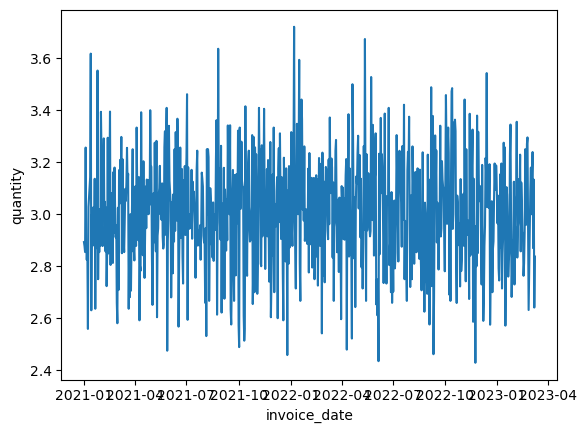

In [10]:
sns.lineplot(data = data2 ,x=data2.index ,y=data2.quantity)

In [11]:
data2["rollMean"] = data2.quantity.rolling(window=12).mean()
data2["rollStd"] = data2.quantity.rolling(window=12).std()

<Axes: xlabel='invoice_date', ylabel='quantity'>

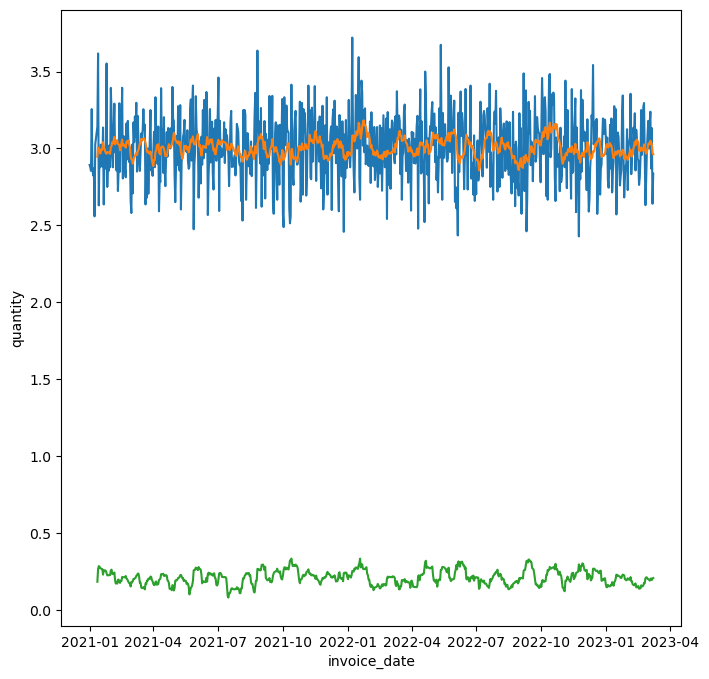

In [12]:
plt.figure(figsize=(8,8))
sns.lineplot(data = data2 ,x=data2.index ,y=data2.quantity)
sns.lineplot(data = data2 ,x=data2.index ,y=data2.rollMean)
sns.lineplot(data = data2 ,x=data2.index ,y=data2.rollStd)

In [13]:
#adf test for checking data is stationar or not
adftest = adfuller(data2["quantity"], autolag = "AIC")
adftest

(-17.51173725525346,
 4.331372402460324e-30,
 2,
 794,
 {'1%': -3.4386126789104074,
  '5%': -2.865186972298872,
  '10%': -2.5687119871327146},
 -188.31317708026722)

In [14]:
stats = pd.Series(adftest[0:4],index=["test statistics","p-value","lags used","no of observation used"])
stats

test statistics          -1.751174e+01
p-value                   4.331372e-30
lags used                 2.000000e+00
no of observation used    7.940000e+02
dtype: float64

In [15]:
for key, values in adftest[4].items():
    print("criticality",key,":", values)

criticality 1% : -3.4386126789104074
criticality 5% : -2.865186972298872
criticality 10% : -2.5687119871327146


In [16]:
#making data stationar  using time shift method

In [17]:
# Extract and print the results
def test_stationarity(dataFrame,var):
    data2["rollMean"] = data2.quantity.rolling(window=12).mean()
    data2["rollStd"] = data2.quantity.rolling(window=12).std()
    
    adftest = adfuller(data2["quantity"], autolag = "AIC")
    stats = pd.Series(adftest[0:4],index=["test statistics","p-value","lags used","no of observation used"])
    print(stats)
    
    for key, values in adftest[4].items():
        print("criticality",key,":", values)
    
    sns.lineplot(data = data2 ,x=data2.index ,y=data2.quantity)
    sns.lineplot(data = data2 ,x=data2.index ,y=data2.rollMean)
    sns.lineplot(data = data2 ,x=data2.index ,y=data2.rollStd)
    

test statistics          -1.751174e+01
p-value                   4.331372e-30
lags used                 2.000000e+00
no of observation used    7.940000e+02
dtype: float64
criticality 1% : -3.4386126789104074
criticality 5% : -2.865186972298872
criticality 10% : -2.5687119871327146


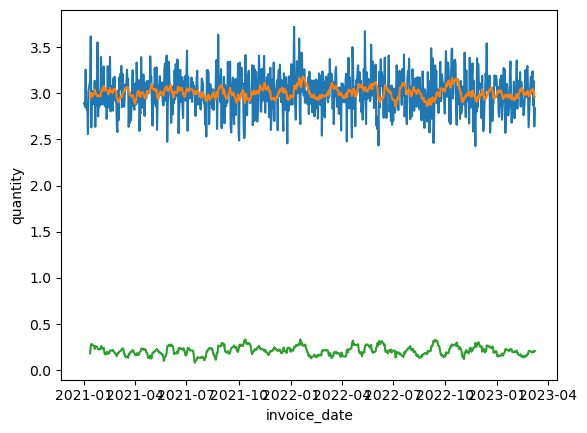

In [18]:
test_stationarity(data2,"quantity")

In [19]:
data2

,quantity,rollMean,rollStd
invoice_date,,,
2021-01-01,2.892857,NaN,NaN
2021-01-02,2.877551,NaN,NaN
2021-01-03,2.854545,NaN,NaN
2021-01-04,3.256410,NaN,NaN
2021-01-05,2.878049,NaN,NaN
...,...,...,...
2023-03-04,3.239130,3.050522,0.198953
2023-03-05,2.869565,3.038137,0.205661
2023-03-06,3.133333,3.026726,0.195140


In [20]:
data3 = data2[["quantity"]]
data3

,quantity
invoice_date,
2021-01-01,2.892857
2021-01-02,2.877551
2021-01-03,2.854545
2021-01-04,3.256410
2021-01-05,2.878049
...,...
2023-03-04,3.239130
2023-03-05,2.869565
2023-03-06,3.133333


# time shift method 

In [21]:
data3["shift"] = data3.quantity.shift() #shift value 
data3["shiftdiff"] = data3["quantity"] - data3["shift"] #shift difference value
data3.head()

C:\Users\prabha\AppData\Local\Temp\ipykernel_8292\2867839299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["shift"] = data3.quantity.shift() #shift value


,quantity,shift,shiftdiff
invoice_date,,,
2021-01-01,2.892857,NaN,NaN
2021-01-02,2.877551,2.892857,-0.015306
2021-01-03,2.854545,2.877551,-0.023006
2021-01-04,3.256410,2.854545,0.401865
2021-01-05,2.878049,3.256410,-0.378361


test statistics          -1.751174e+01
p-value                   4.331372e-30
lags used                 2.000000e+00
no of observation used    7.940000e+02
dtype: float64
criticality 1% : -3.4386126789104074
criticality 5% : -2.865186972298872
criticality 10% : -2.5687119871327146


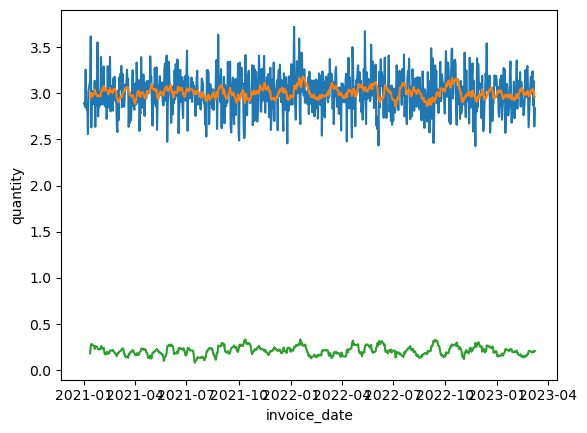

In [22]:
test_stationarity(data3.dropna(),"shiftdiff")

In [56]:
#log method 
logdf = data2[["quantity"]]
logdf["log"] = np.log(logdf["quantity"])
logdf.head()

C:\Users\prabha\AppData\Local\Temp\ipykernel_8292\2292529697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logdf["log"] = np.log(logdf["quantity"])


,quantity,log
invoice_date,,
2021-01-01,2.892857,1.062245
2021-01-02,2.877551,1.056940
2021-01-03,2.854545,1.048913
2021-01-04,3.256410,1.180625
2021-01-05,2.878049,1.057113


test statistics          -1.751174e+01
p-value                   4.331372e-30
lags used                 2.000000e+00
no of observation used    7.940000e+02
dtype: float64
criticality 1% : -3.4386126789104074
criticality 5% : -2.865186972298872
criticality 10% : -2.5687119871327146


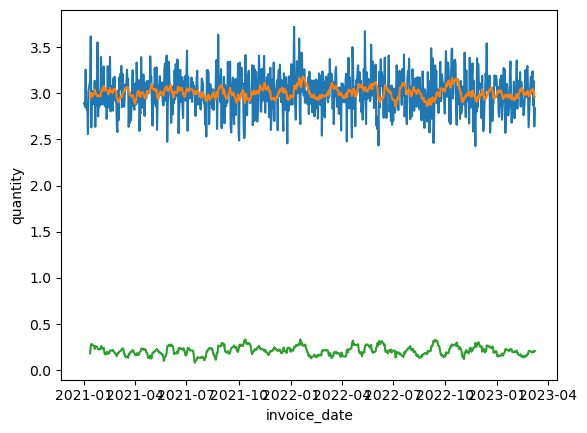

In [24]:
test_stationarity(logdf,"log")

In [25]:
#sqrt
sqrtdf = data2[["quantity"]]
sqrtdf["sqrt"] = np.sqrt(sqrtdf["quantity"])
sqrtdf.head()

C:\Users\prabha\AppData\Local\Temp\ipykernel_8292\66225766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrtdf["sqrt"] = np.sqrt(sqrtdf["quantity"])


,quantity,sqrt
invoice_date,,
2021-01-01,2.892857,1.700840
2021-01-02,2.877551,1.696335
2021-01-03,2.854545,1.689540
2021-01-04,3.256410,1.804553
2021-01-05,2.878049,1.696481


test statistics          -1.751174e+01
p-value                   4.331372e-30
lags used                 2.000000e+00
no of observation used    7.940000e+02
dtype: float64
criticality 1% : -3.4386126789104074
criticality 5% : -2.865186972298872
criticality 10% : -2.5687119871327146


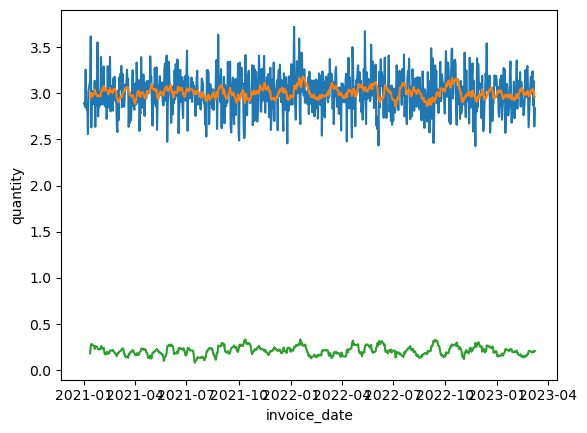

In [26]:
test_stationarity(logdf,"sqrt")

# ARIMA Model

In [27]:
airdf=data2[["quantity"]].copy(deep=True)
airdf["firstdiff"] = airdf["quantity"].diff()
airdf["diff12"] = airdf["quantity"].diff(12)

In [28]:
airdf.head()

,quantity,firstdiff,diff12
invoice_date,,,
2021-01-01,2.892857,NaN,NaN
2021-01-02,2.877551,-0.015306,NaN
2021-01-03,2.854545,-0.023006,NaN
2021-01-04,3.256410,0.401865,NaN
2021-01-05,2.878049,-0.378361,NaN


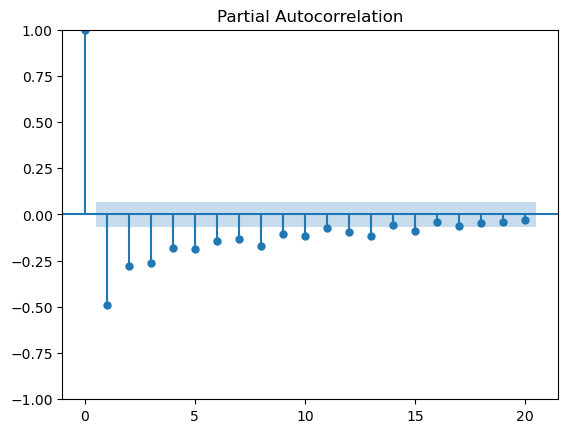

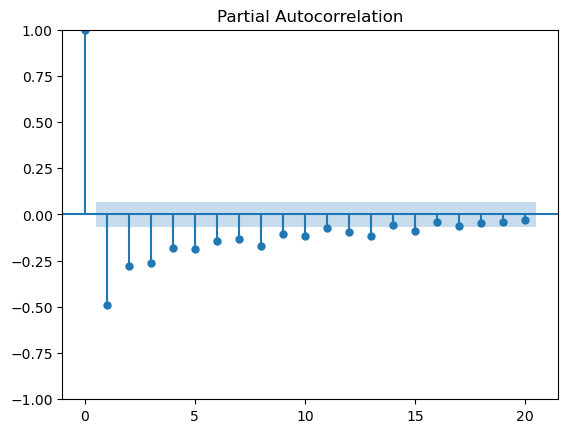

In [29]:
plot_pacf(airdf["firstdiff"].dropna(),lags=20,method='ywm')

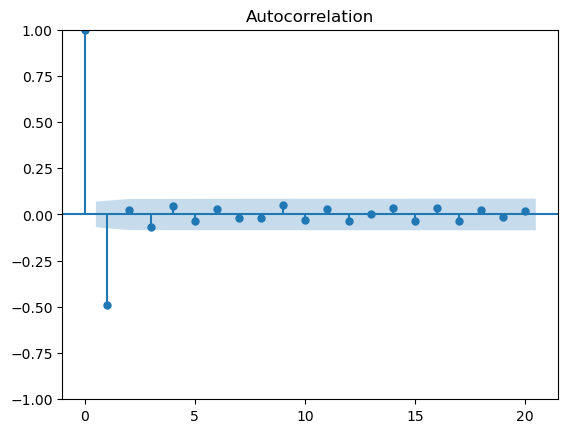

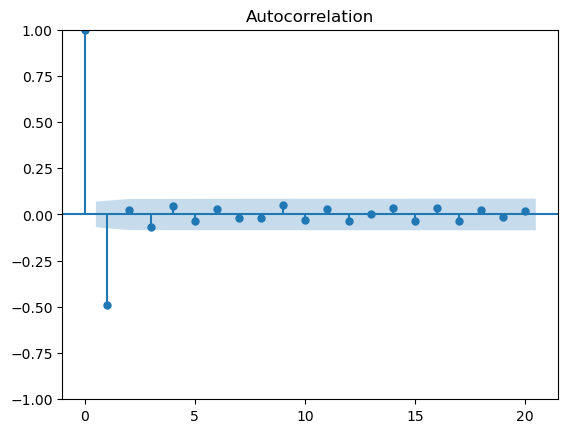

In [30]:
plot_acf(airdf["firstdiff"].dropna(),lags=20)

In [31]:
#p=1 q=2 d=1

In [32]:
len(airdf) #length of data for 12 years 

797

In [33]:
train=airdf[:round(len(airdf)*70/100)]#70% od my data
test =airdf[round(len(airdf)*70/100):]
train.tail()

,quantity,firstdiff,diff12
invoice_date,,,
2022-07-08,3.129630,-0.174718,0.222653
2022-07-09,3.023256,-0.106374,0.323256
2022-07-10,2.818182,-0.205074,-0.266925
2022-07-11,3.214286,0.396104,0.555195
2022-07-12,3.243902,0.029617,0.375050


In [34]:
test.head()

,quantity,firstdiff,diff12
invoice_date,,,
2022-07-13,3.210526,-0.033376,0.508399
2022-07-14,3.106383,-0.104143,0.106383
2022-07-15,3.044444,-0.061939,-0.008187
2022-07-16,2.875000,-0.169444,0.083333
2022-07-17,3.261905,0.386905,0.410841


In [35]:
model=ARIMA(train["quantity"],order=(1,1,2))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airdf["arimapred"] = prediction
airdf.tail()

C:\Users\prabha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\prabha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\prabha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\prabha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\prabha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA par

,quantity,firstdiff,diff12,arimapred
invoice_date,,,,
2023-03-04,3.239130,0.079130,0.280797,3.007394
2023-03-05,2.869565,-0.369565,-0.148617,3.007394
2023-03-06,3.133333,0.263768,-0.136937,3.007394
2023-03-07,2.641026,-0.492308,-0.654429,3.007394
2023-03-08,2.837209,0.196184,-0.119312,3.007394


<Axes: xlabel='invoice_date', ylabel='quantity'>

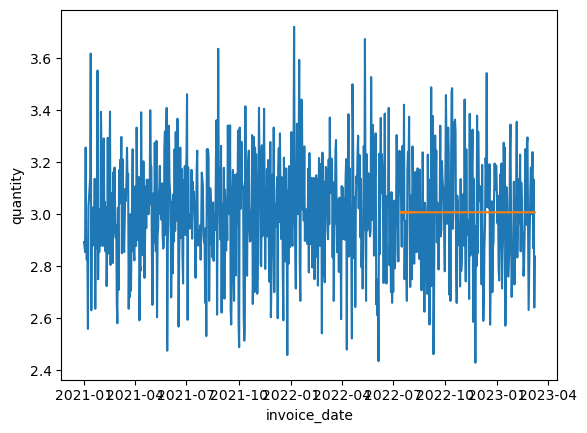

In [36]:
airdf.dropna()
sns.lineplot(data=airdf, x=airdf.index, y="quantity")
sns.lineplot(data=airdf, x=airdf.index, y="arimapred")

In [37]:
np.sqrt(mean_squared_error(test["quantity"],prediction))

0.2147281257775247

In [38]:
arima_rmse = np.sqrt(mean_squared_error(test["quantity"], prediction))
arima_mae = mean_absolute_error(test["quantity"], prediction)

print("ARIMA RMSE:", arima_rmse)
print("ARIMA MAE:", arima_mae)

ARIMA RMSE: 0.2147281257775247
ARIMA MAE: 0.17598140601713191


In [39]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test["quantity"] - prediction) / test["quantity"])) * 100
print(f'MAPE: {mape}%')

MAPE: 5.927498826179003%


# SARIMAX Model

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

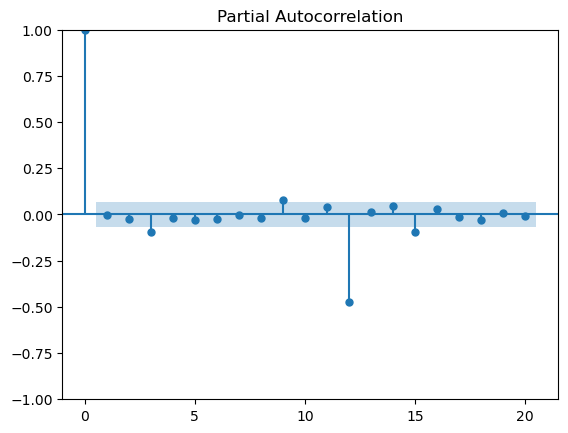

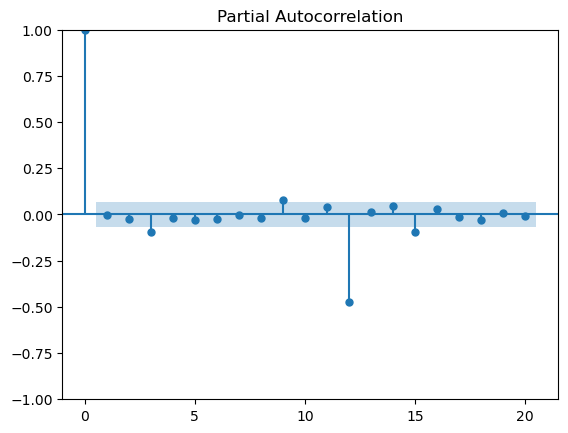

In [41]:
plot_pacf(airdf["diff12"].dropna(),lags=20,method='ywm')

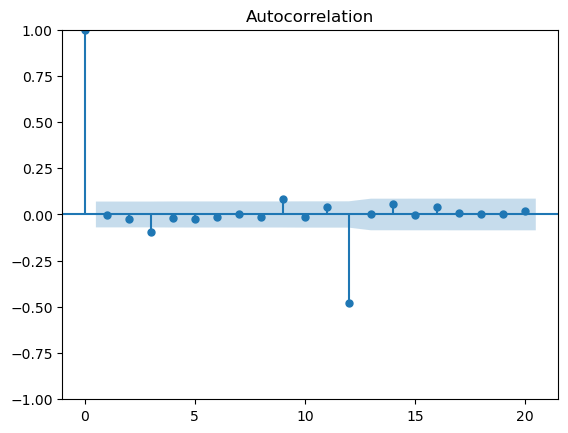

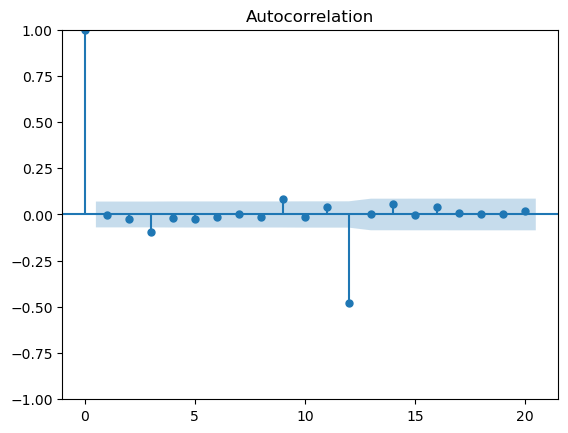

In [42]:
plot_acf(airdf["diff12"].dropna(),lags=20)

In [43]:
model = SARIMAX(train["quantity"],order=(1,1,2),seasonal_order=(1,1,4,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airdf["arimaxpred"] = prediction

C:\Users\prabha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\prabha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [44]:
airdf.tail()

,quantity,firstdiff,diff12,arimapred,arimaxpred
invoice_date,,,,,
2023-03-04,3.239130,0.079130,0.280797,3.007394,3.009237
2023-03-05,2.869565,-0.369565,-0.148617,3.007394,2.997173
2023-03-06,3.133333,0.263768,-0.136937,3.007394,3.078542
2023-03-07,2.641026,-0.492308,-0.654429,3.007394,2.993827
2023-03-08,2.837209,0.196184,-0.119312,3.007394,3.044521


<Axes: xlabel='invoice_date', ylabel='quantity'>

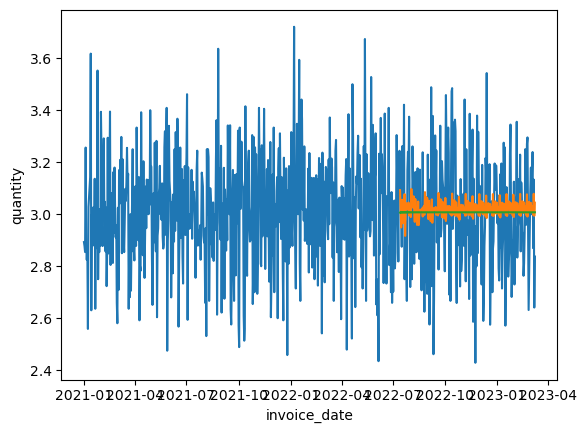

In [45]:
airdf.dropna()
sns.lineplot(data=airdf, x=airdf.index, y="quantity")
sns.lineplot(data=airdf, x=airdf.index, y="arimaxpred")
sns.lineplot(data=airdf, x=airdf.index, y="arimapred")

In [46]:
np.sqrt(mean_squared_error(test["quantity"],prediction))

0.21928675093597827

In [47]:
sarimax_rmse = np.sqrt(mean_squared_error(test["quantity"], prediction))
sarimax_mae = mean_absolute_error(test["quantity"], prediction)

print("SARIMAX RMSE:", sarimax_rmse)
print("SARIMAX MAE:", sarimax_mae)

SARIMAX RMSE: 0.21928675093597827
SARIMAX MAE: 0.17873725570748164


In [48]:
# Calculate Mean Absolute Percentage Error (MAPE) for SARIMAX
mape_sarimax = np.mean(np.abs((test["quantity"] - prediction) / test["quantity"])) * 100
print(f'MAPE for SARIMAX: {mape_sarimax}%')

MAPE for SARIMAX: 6.04940589252936%


# Future Prediction

In [49]:
airdf.tail()

,quantity,firstdiff,diff12,arimapred,arimaxpred
invoice_date,,,,,
2023-03-04,3.239130,0.079130,0.280797,3.007394,3.009237
2023-03-05,2.869565,-0.369565,-0.148617,3.007394,2.997173
2023-03-06,3.133333,0.263768,-0.136937,3.007394,3.078542
2023-03-07,2.641026,-0.492308,-0.654429,3.007394,2.993827
2023-03-08,2.837209,0.196184,-0.119312,3.007394,3.044521


In [50]:
futuredate=pd.DataFrame(pd.date_range(start="2023-03-08",end="2023-10-08",freq="MS"),columns=["dates"])
futuredate.set_index("dates",inplace=True)
futuredate.head()

""
dates
2023-04-01
2023-05-01
2023-06-01
2023-07-01
2023-08-01


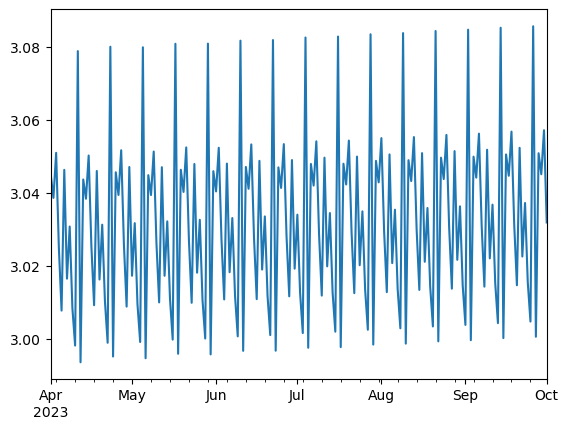

In [51]:
future_predictions = model_fit.predict(start=futuredate.index[0],end=futuredate.index[-1]).plot()

<Axes: xlabel='invoice_date', ylabel='quantity'>

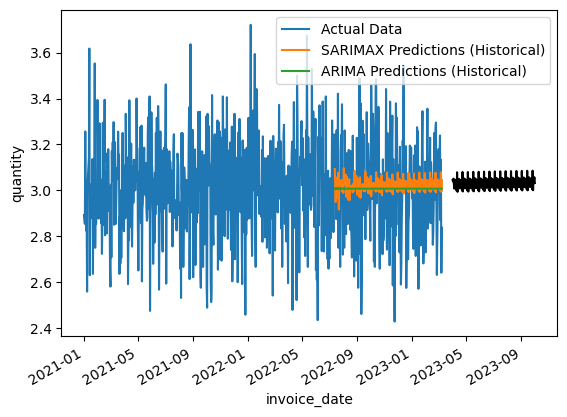

In [52]:
airdf.dropna()
sns.lineplot(data=airdf, x=airdf.index, y="quantity", label="Actual Data")
sns.lineplot(data=airdf, x=airdf.index, y="arimaxpred", label="SARIMAX Predictions (Historical)")
sns.lineplot(data=airdf, x=airdf.index, y="arimapred", label="ARIMA Predictions (Historical)")
model_fit.predict(start=futuredate.index[0],end=futuredate.index[-1]).plot(color="black", label="SARIMAX Predictions (Future)")

# LSTM Model

In [53]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [62]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import seaborn as sns

In [63]:
data2.head()

,quantity,rollMean,rollStd
invoice_date,,,
2021-01-01,2.892857,NaN,NaN
2021-01-02,2.877551,NaN,NaN
2021-01-03,2.854545,NaN,NaN
2021-01-04,3.256410,NaN,NaN
2021-01-05,2.878049,NaN,NaN


In [64]:
# Assuming 'quantity' is the target variable
quantity_data = data2['quantity'].values.reshape(-1, 1)

In [65]:
# Normalize data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
quantity_data_scaled = scaler.fit_transform(quantity_data)

In [66]:
# Function to create dataset with look_back time steps
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [67]:
# Split the data into train and test sets
train_size = int(len(quantity_data_scaled) * 0.7)
test_size = len(quantity_data_scaled) - train_size
train, test = quantity_data_scaled[0:train_size, :], quantity_data_scaled[train_size:len(quantity_data_scaled), :]


In [68]:
# Create datasets with look_back time steps
look_back = 12  # Adjust as needed
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [69]:
# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [70]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [71]:
# Fit the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
545/545 - 4s - loss: 0.0343 - 4s/epoch - 8ms/step
Epoch 2/100
545/545 - 1s - loss: 0.0306 - 1s/epoch - 2ms/step
Epoch 3/100
545/545 - 1s - loss: 0.0300 - 1s/epoch - 2ms/step
Epoch 4/100
545/545 - 1s - loss: 0.0299 - 1s/epoch - 2ms/step
Epoch 5/100
545/545 - 1s - loss: 0.0290 - 1s/epoch - 3ms/step
Epoch 6/100
545/545 - 2s - loss: 0.0292 - 2s/epoch - 3ms/step
Epoch 7/100
545/545 - 2s - loss: 0.0288 - 2s/epoch - 3ms/step
Epoch 8/100
545/545 - 1s - loss: 0.0284 - 1s/epoch - 2ms/step
Epoch 9/100
545/545 - 1s - loss: 0.0286 - 1s/epoch - 3ms/step
Epoch 10/100
545/545 - 1s - loss: 0.0284 - 1s/epoch - 2ms/step
Epoch 11/100
545/545 - 1s - loss: 0.0285 - 1s/epoch - 2ms/step
Epoch 12/100
545/545 - 1s - loss: 0.0283 - 1s/epoch - 2ms/step
Epoch 13/100
545/545 - 1s - loss: 0.0284 - 1s/epoch - 2ms/step
Epoch 14/100
545/545 - 1s - loss: 0.0279 - 1s/epoch - 2ms/step
Epoch 15/100
545/545 - 1s - loss: 0.0277 - 1s/epoch - 3ms/step
Epoch 16/100
545/545 - 2s - loss: 0.0281 - 2s/epoch - 3ms/step
E

In [72]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

8/8 [==============================] - 0s 3ms/step


In [73]:
# Invert predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [74]:
# Calculate MAE and RMSE
train_mae = mean_absolute_error(trainY[0], trainPredict[:, 0])
train_rmse = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
test_mae = mean_absolute_error(testY[0], testPredict[:, 0])
test_rmse = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))

In [75]:
# Print metrics
print(f'Training MAE: {train_mae}')
print(f'Training RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}')
print(f'Test RMSE: {test_rmse}')

Training MAE: 0.1684887869623105
Training RMSE: 0.2121450114827458
Test MAE: 0.17707121116585875
Test RMSE: 0.22160285800160415


In [79]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [80]:
# Calculate MAE, RMSE, and MAPE
train_mae = mean_absolute_error(trainY[0], trainPredict[:, 0])
train_rmse = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
train_mape = mean_absolute_percentage_error(trainY[0], trainPredict[:, 0])


In [81]:
test_mae = mean_absolute_error(testY[0], testPredict[:, 0])
test_rmse = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
test_mape = mean_absolute_percentage_error(testY[0], testPredict[:, 0])

In [82]:
# Print metrics
print(f'Training MAE: {train_mae}')
print(f'Training RMSE: {train_rmse}')
print(f'Training MAPE: {train_mape}%')

print(f'Test MAE: {test_mae}')
print(f'Test RMSE: {test_rmse}')
print(f'Test MAPE: {test_mape}%')

Training MAE: 0.1684887869623105
Training RMSE: 0.2121450114827458
Training MAPE: 5.539325734018028%
Test MAE: 0.17707121116585875
Test RMSE: 0.22160285800160415
Test MAPE: 5.855633037308911%


In [76]:
# Plot predictions
trainPredictPlot = np.empty_like(quantity_data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [77]:
testPredictPlot = np.empty_like(quantity_data_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(quantity_data_scaled), :] = testPredict


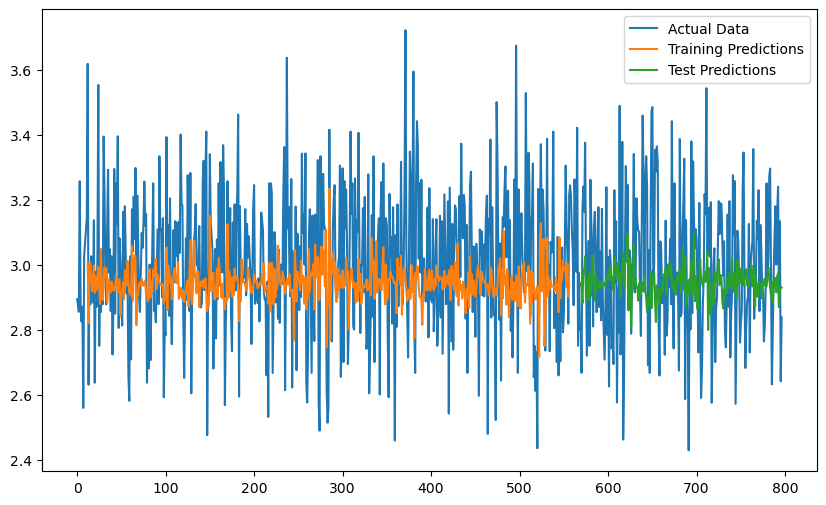

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(quantity_data_scaled), label='Actual Data')
plt.plot(trainPredictPlot, label='Training Predictions')
plt.plot(testPredictPlot, label='Test Predictions')
plt.legend()
plt.show()